<h1>Zadanie4</h1>

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.signal import butter, lfilter, freqz

In [2]:
def readFile(filename):
    global ekg
    try:
        with open(filename, 'r') as file:
            ekg = file.read()

    except FileNotFoundError:
        print(f"Plik {filename} nie został znaleziony.")
    except Exception as e:
        print(f"Wystąpił błąd podczas wczytywania pliku {filename}: {e}")

Wczytywanie danych z pliku

In [3]:
readFile("ekg_noise.txt")

signals = np.array([list(map(float, line.split())) for line in ekg.split("\n")])

x = signals.T[0]
y = signals.T[1]


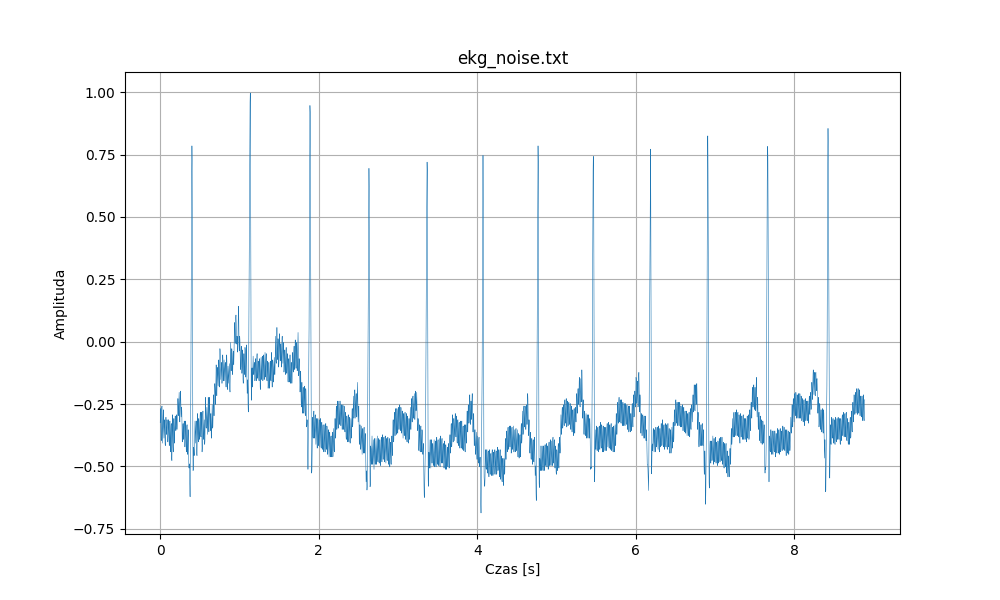

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, lw=0.4)
plt.title('ekg_noise.txt')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

<h1>1</h1>
Charakterystyka amplitudowa sygnału.

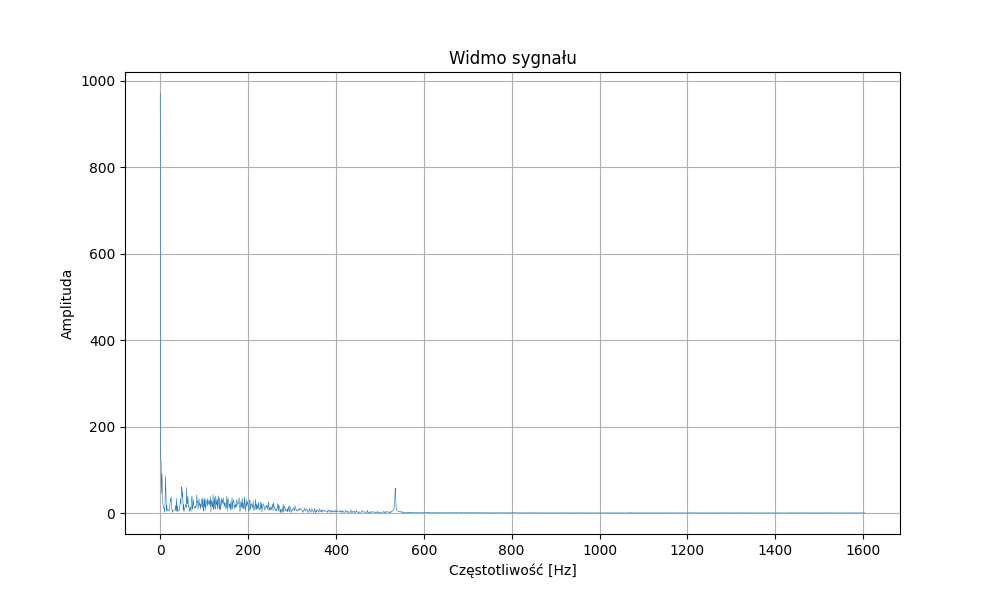

In [5]:
fs = len(y)/max(y) #częstotliwość próbkowania

dft = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), 1/fs)


# Wykres widma amplitudowego
plt.figure(figsize=(10, 6))
plt.plot(freq[:len(freq)//2], abs(dft[:len(freq)//2]), lw=0.4)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo sygnału')
plt.grid(True)
plt.show()

<h3>2</h3>
Filtracja dolnoprzepustowa sygnału

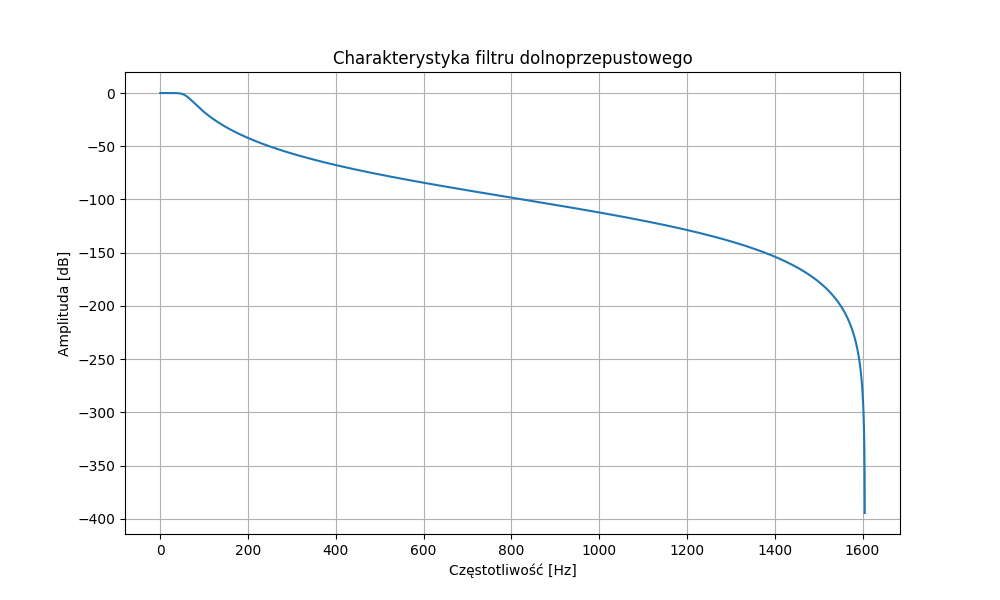

In [6]:
fs = len(y)/max(y)  # częstotliwość próbkowania

# Projektowanie filtru dolnoprzepustowego Butterwortha
fc = 60  # częstotliwość graniczna [Hz]
order = 4  # rząd filtra
b, a = butter(order, fc, fs=fs, btype='low')

# Filtracja sygnału EKG
lfiltered_signal = lfilter(b, a, y)

# Wygenerowanie charakterystyki częstotliwościowej filtru
w, h = freqz(b, a, worN=8000)
frequencies = fs * w / (2 * np.pi)

# Wykreślenie charakterystyki częstotliwościowej
plt.figure(figsize=(10, 6))
plt.plot(frequencies, 20 * np.log10(abs(h)))
plt.title('Charakterystyka filtru dolnoprzepustowego')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [dB]')
plt.grid()
plt.show()


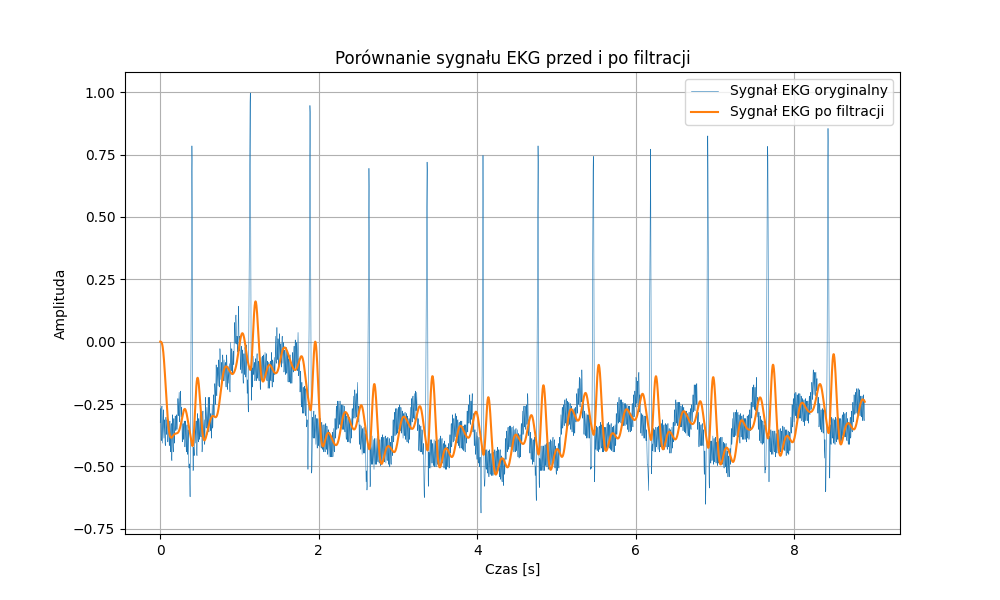

In [7]:
# Wykreślenie sygnału EKG przed i po filtracji
plt.figure(figsize=(10, 6))
plt.plot(x, y, lw=0.4, label='Sygnał EKG oryginalny')
plt.plot(x, lfiltered_signal, label='Sygnał EKG po filtracji')
plt.title('Porównanie sygnału EKG przed i po filtracji')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid()
plt.show()

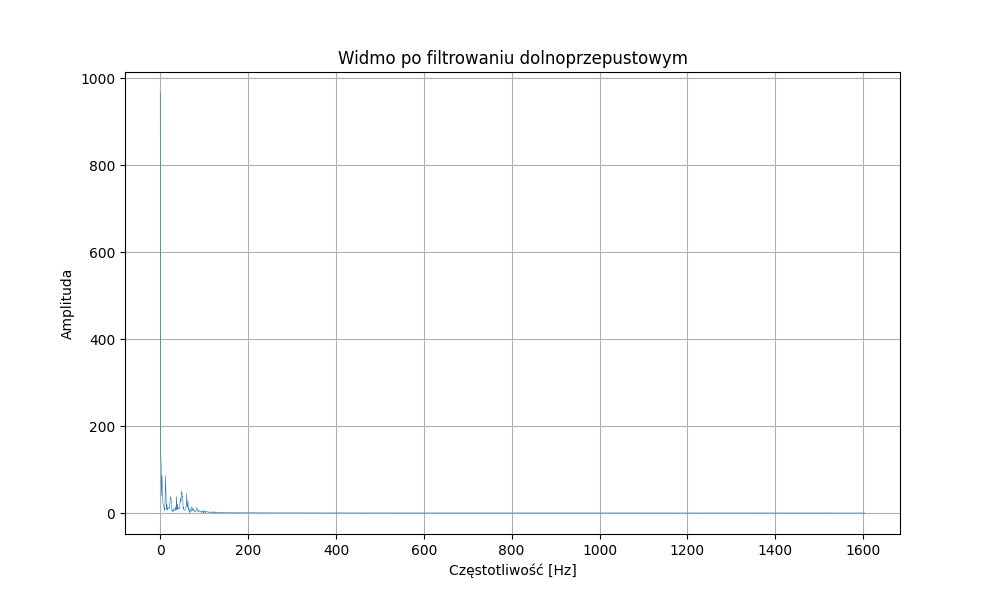

In [8]:
dft_lfiltered = np.fft.fft(lfiltered_signal)

# Wykres widma amplitudowego
plt.figure(figsize=(10, 6))
plt.plot(freq[:len(freq)//2], abs(dft_lfiltered[:len(freq)//2]), lw=0.4)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo po filtrowaniu dolnoprzepustowym')
plt.grid(True)
plt.show()

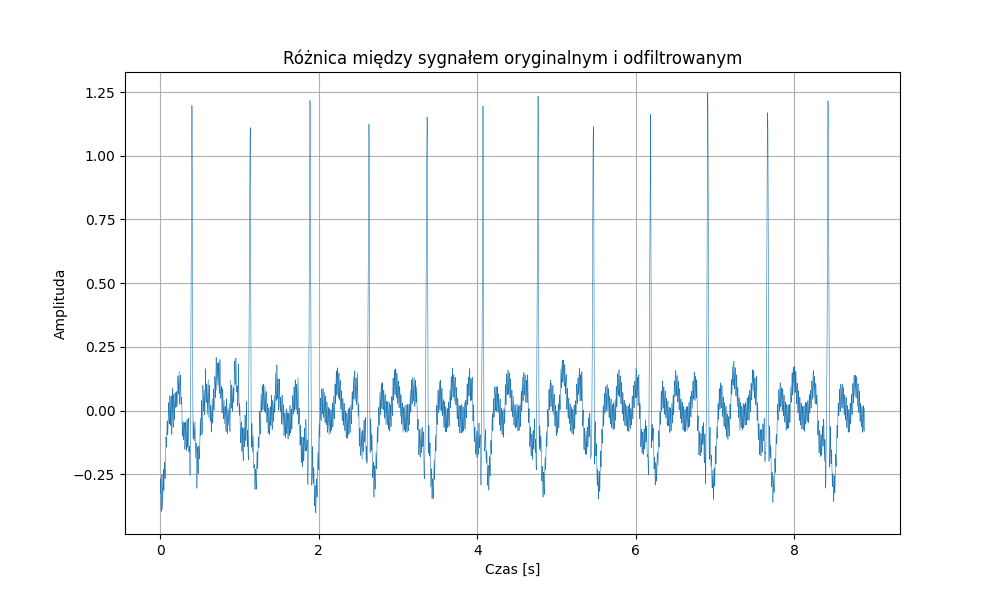

In [9]:
diff = y - lfiltered_signal

plt.figure(figsize=(10, 6))
plt.plot(x, diff, lw=0.4)
plt.title('Różnica między sygnałem oryginalnym i odfiltrowanym')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid()
plt.show()

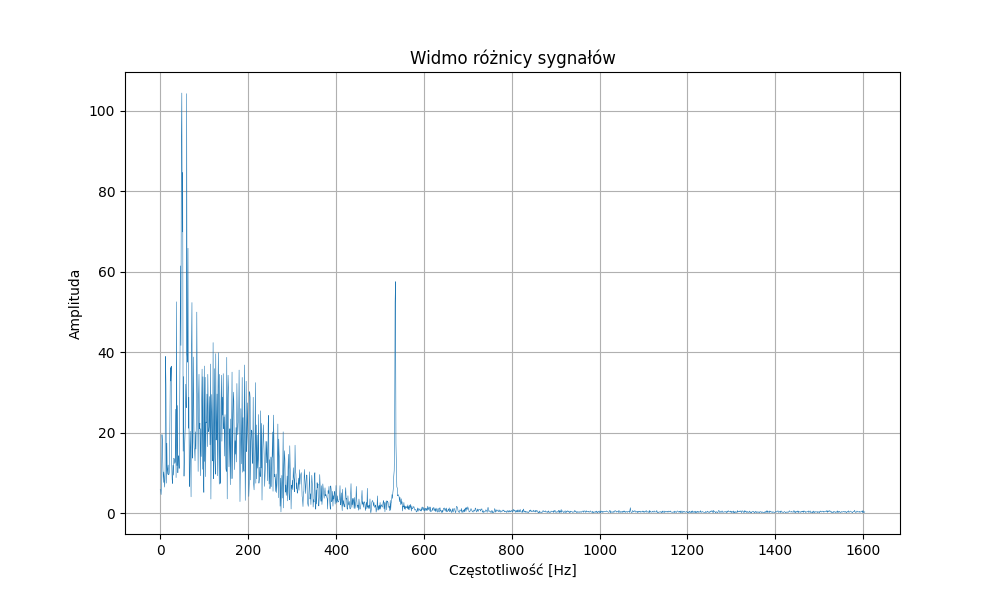

In [10]:
dft_diff = np.fft.fft(diff)

# Wykres widma amplitudowego
plt.figure(figsize=(10, 6))
plt.plot(freq[:len(freq)//2], abs(dft_diff[:len(freq)//2]), lw=0.4)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo różnicy sygnałów')
plt.grid(True)
plt.show()

<h3>3</h3>
Filtracja górnoprzepustowa sygnału

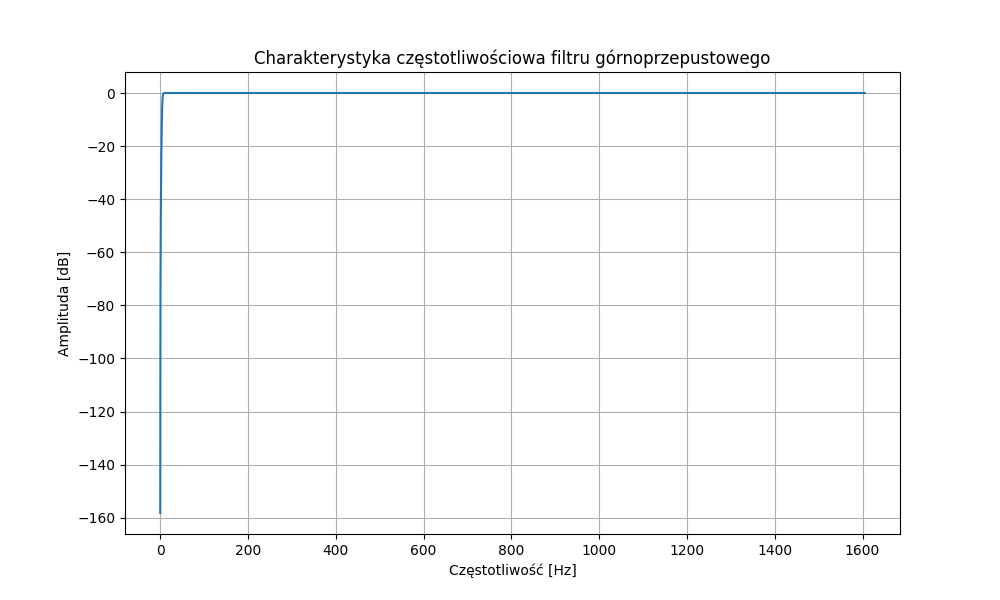

In [11]:

# Projektowanie filtru górnoprzepustowego Butterwortha
fc = 5  # częstotliwość graniczna [Hz]
order = 4  # rząd filtra
b, a = butter(order, fc, fs=fs, btype='high')

# Filtracja sygnału EKG
hfiltered_signal = lfilter(b, a, lfiltered_signal)

# Wygenerowanie charakterystyki częstotliwościowej filtru
w, h = freqz(b, a, worN=8000)
frequencies = fs * w / (2 * np.pi)

# Wykreślenie charakterystyki częstotliwościowej
plt.figure(figsize=(10, 6))
plt.plot(frequencies, 20 * np.log10(abs(h)))
plt.title('Charakterystyka częstotliwościowa filtru górnoprzepustowego')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [dB]')
plt.grid()
plt.show()


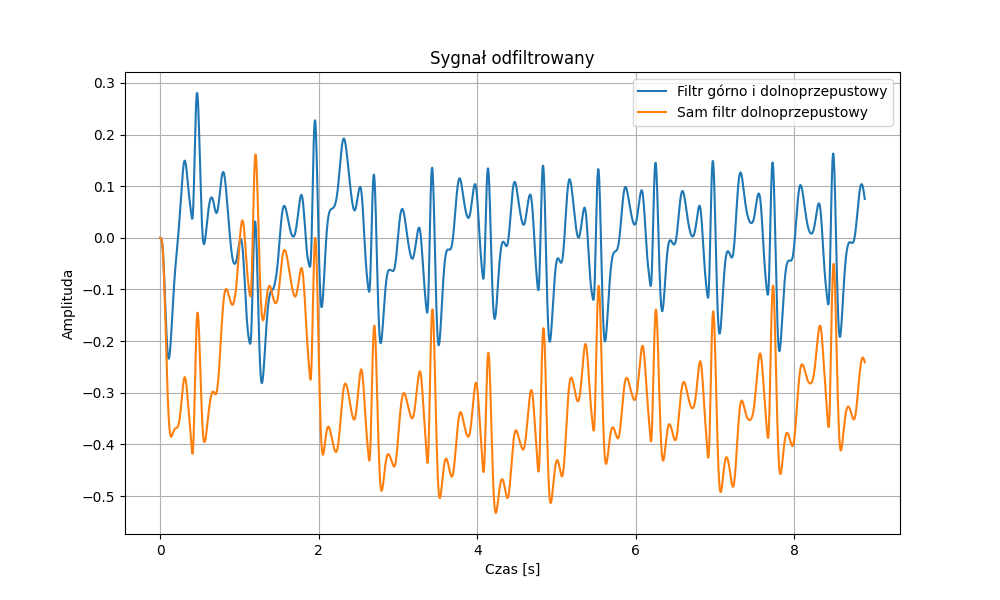

In [12]:
# Wykreślenie sygnału EKG przed i po filtracji
plt.figure(figsize=(10, 6))
plt.plot(x, hfiltered_signal, label='Filtr górno i dolnoprzepustowy')
plt.plot(x, lfiltered_signal, label='Sam filtr dolnoprzepustowy')
plt.title('Sygnał odfiltrowany')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid()
plt.show()

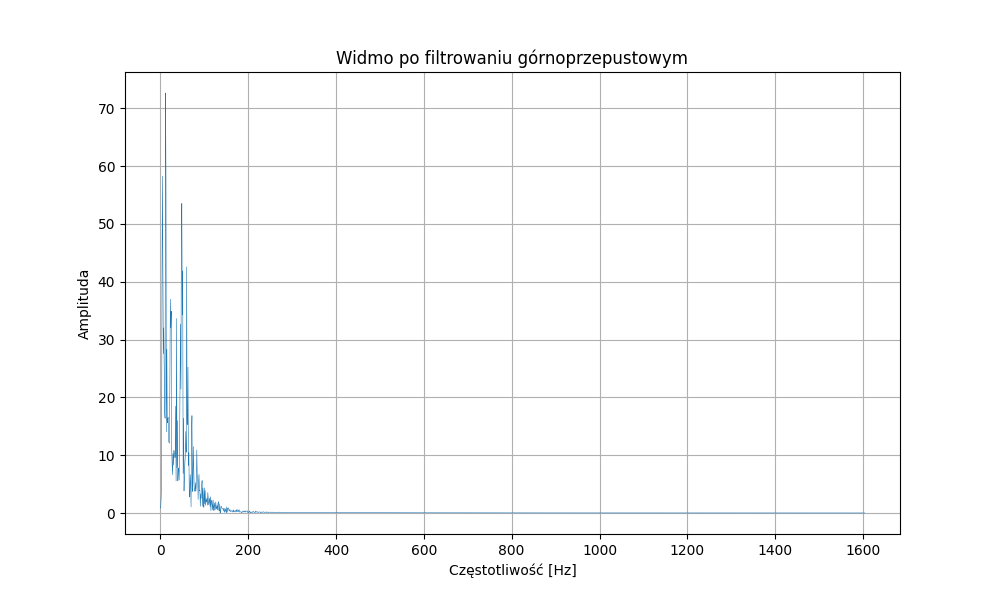

In [13]:
dft_hfiltered = np.fft.fft(hfiltered_signal)

# Wykres widma amplitudowego
plt.figure(figsize=(10, 6))
plt.plot(freq[:len(freq)//2], abs(dft_hfiltered[:len(freq)//2]), lw=0.4)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo po filtrowaniu górnoprzepustowym')
plt.grid(True)
plt.show()

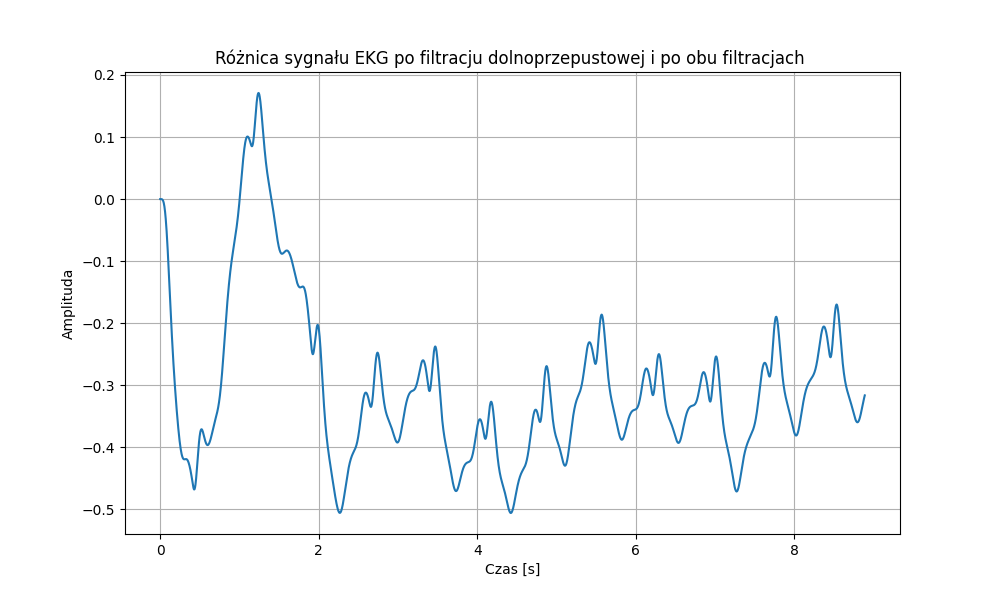

In [14]:
diff_LH = lfiltered_signal - hfiltered_signal

plt.figure(figsize=(10, 6))
plt.plot(x, diff_LH)
plt.title('Różnica sygnału EKG po filtracju dolnoprzepustowej i po obu filtracjach ')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid()
plt.show()

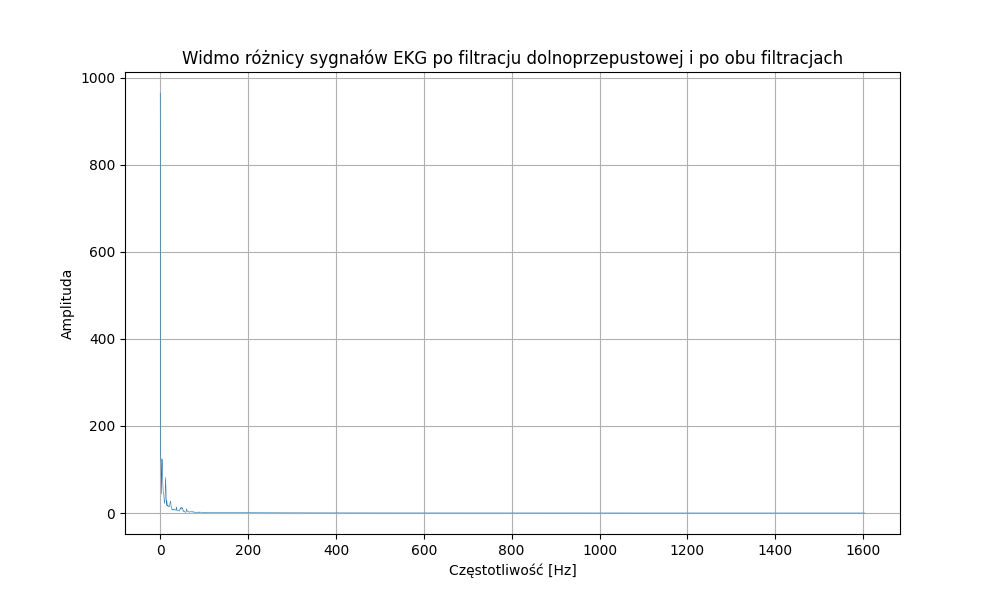

In [15]:
dft_diffLH = np.fft.fft(diff_LH)

# Wykres widma amplitudowego
plt.figure(figsize=(10, 6))
plt.plot(freq[:len(freq)//2], abs(dft_diffLH[:len(freq)//2]), lw=0.4)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo różnicy sygnałów EKG po filtracju dolnoprzepustowej i po obu filtracjach')
plt.grid(True)
plt.show()

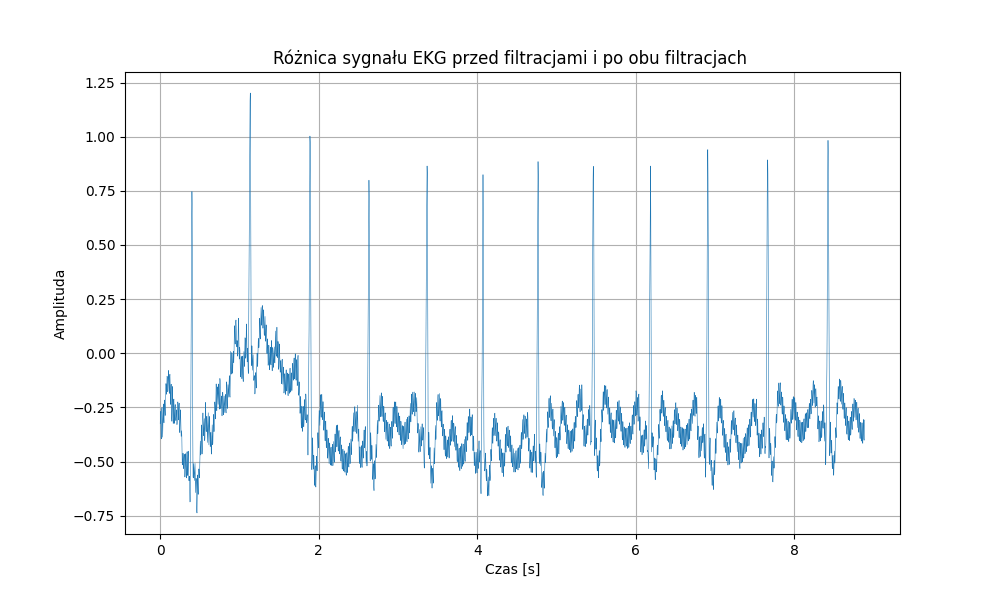

In [16]:
diff_yH = y - hfiltered_signal

plt.figure(figsize=(10, 6))
plt.plot(x, diff_yH, lw=0.4)
plt.title('Różnica sygnału EKG przed filtracjami i po obu filtracjach ')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid()
plt.show()

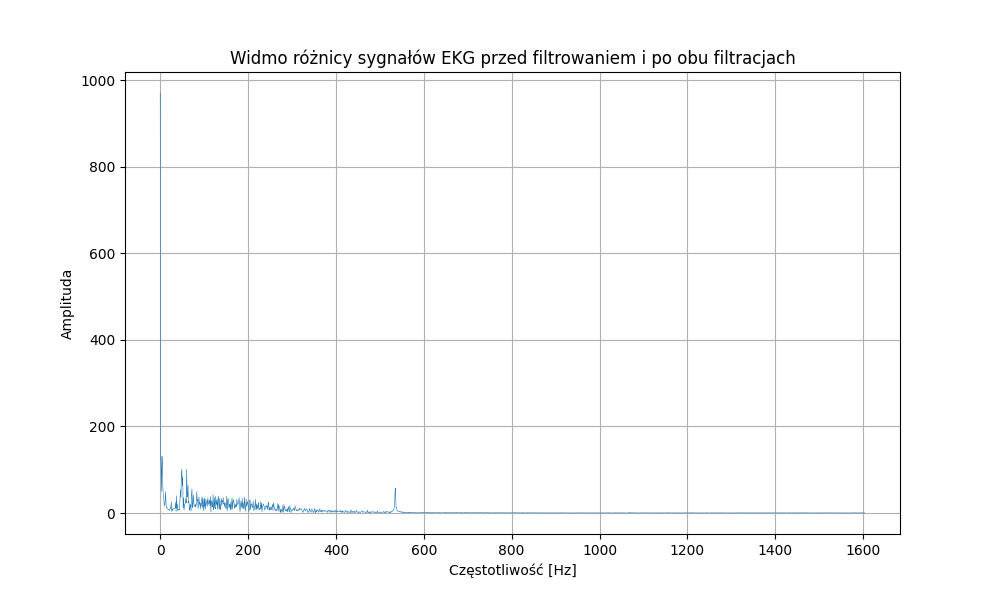

In [17]:
dft_diffyH = np.fft.fft(diff_yH)

# Wykres widma amplitudowego
plt.figure(figsize=(10, 6))
plt.plot(freq[:len(freq)//2], abs(dft_diffyH[:len(freq)//2]), lw=0.4)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo różnicy sygnałów EKG przed filtrowaniem i po obu filtracjach')
plt.grid(True)
plt.show()